This is exploratory analysis to get overall expression about the dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
df = pd.read_json('reports.json')

We take only rows that:
1. Have all fields filled
2. Have full date and time specified

In [39]:
df = df.dropna(axis=0, how='any')
df = df[df['date_time'].str.contains('\d{1,2}\/\d{1,2}\/\d{2} \d{2}:\d{2}')]

In [40]:
print("Number of rows: {}".format(len(df)))

Number of rows: 97370


In [41]:
df.head(10)

,city,date_time,duration,posted,shape,state,summary
0,Louisville,9/28/17 00:00,5 minutes,9/28/17,Light,KY,1 light became 2 lights that surrounded a bigg...
1,Blaine,9/27/17 23:40,1 minute,9/28/17,Flash,MN,"Shooting star like object fell towards Earth, ..."
2,Tacoma,9/27/17 21:30,45 minutes,9/28/17,Triangle,WA,Bright illuminating diamond and round shape ob...
3,Johnston City,9/27/17 21:00,3+ hours,9/28/17,Triangle,IL,Some of the objects appeared to have pulsatin...
4,Bridgeport,9/27/17 20:18,1 minute,9/28/17,Light,CT,"Red and green flashing, motionless object that..."
5,Conway,9/27/17 19:45,1 minute,9/28/17,Light,AR,3 moving lights.
6,Puyallup,9/27/17 19:05,1 minute,9/28/17,Circle,WA,Bright circular object in southern sky at dusk...
7,Banff (Canada),9/27/17 12:45,1 minute,9/28/17,Light,AB,Light with purplish ring.
8,Canton,9/27/17 08:52,2 minutes,9/28/17,Rectangle,GA,Two adult males witness two quadrilateral obje...
9,Raleigh,9/27/17 07:28,10 seconds,9/28/17,Cigar,NC,White cigar shaped UFO flew over small patch o...


In [42]:
df.describe()

,city,date_time,duration,posted,shape,state,summary
count,97370,97370,97370,97370,97370,97370,97370
unique,19384,83151,10656,487,45,69,96881
top,Phoenix,11/7/15 18:00,5 minutes,12/12/09,Light,CA,((NUFORC Note: No information provided by wit...
freq,595,100,6204,1424,20698,12058,21


In [43]:
df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format=True, errors='coerce')

Filter out what has been parsed incorrectly

In [44]:
df = df[~df['date_time'].isnull()]

Top cities to meet a UFO

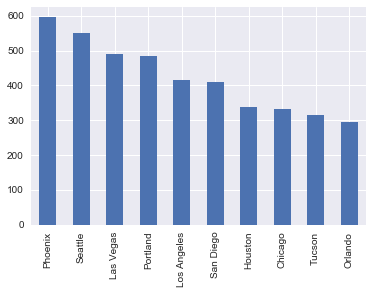

In [45]:
top_count = 10
df['city'].value_counts().sort_values(ascending=False).head(top_count).plot(kind='bar')

Top states to meet UFO

In [46]:
df['state'] = df['state'].apply(str.upper)

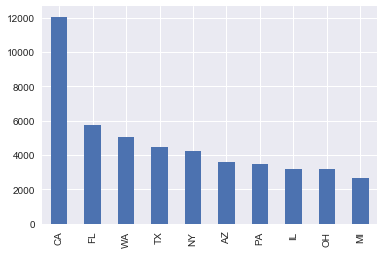

In [47]:
df['state'].value_counts().sort_values(ascending=False).head(top_count).plot(kind='bar')

 Shapes distribution

In [48]:
df['shape'] = df['shape'].apply(str.upper)

In [49]:
shape_replacements = {'FLARE': 'FLASH', 'CYLINDER': 'CIGAR', 'UNKNOWN': 'OTHER',
                      'TRIGANGULAR': 'TRIANGLE', 'DELTA': 'TRIANGLE', 'ROUND': 'SPHERE',
                      'CHANGED': 'CHANGING'}
df = df.replace({'shape': shape_replacements})

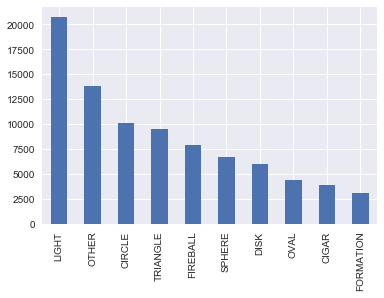

In [50]:
df['shape'].value_counts().sort_values(ascending=False).head(top_count).plot(kind='bar')

In [62]:
df['city'] = df['city'].astype('category')
df['shape'] = df['shape'].astype('category')
df['duration'] = df['duration'].astype('category')

In [63]:
df.describe()

,city,date_time,duration,posted,shape,state,summary
count,97356,97356,97356,97356,97356,97356,97356
unique,19380,83136,10655,487,23,68,96867
top,Phoenix,2015-11-07 18:00:00,5 minutes,12/12/09,LIGHT,CA,((NUFORC Note: No information provided by wit...
freq,595,100,6204,1424,20753,12058,21
first,NaN,1967-01-01 13:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2066-12-28 19:00:00,NaN,NaN,NaN,NaN,NaN
